In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [503]:
#Reading excel sheet 
mean_age_marriages = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'MeanAgeFirstMarriage', 
                                   header = 3, indexcol=0, skipfooter = 25)

In [504]:
#forward filling Country column in order to remove NaN 
mean_age_marriages["Country"] = mean_age_marriages["Country"].ffill()

# Changing data types to numeric
cols = mean_age_marriages.columns.drop(["Country",  "Gender"])
mean_age_marriages[cols] = mean_age_marriages[cols].apply(pd.to_numeric, errors='coerce')


In [505]:
mean_age_marriages.head()

,Country,Gender,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Australia,Male,26.5,26.7,26.9,27.0,27.2,27.3,27.6,27.8,...,29.6,29.6,29.6,29.6,29.7,29.8,29.9,30.0,30.1,30.3
1,Australia,Female,24.3,24.5,24.7,24.8,25.1,25.3,25.7,25.9,...,27.6,27.7,27.7,27.9,28.0,28.1,28.3,28.4,28.5,28.7
2,Austria,Male,27.7,27.9,28.0,28.4,28.7,29.0,29.1,29.3,...,32.0,32.2,32.5,32.7,32.9,33.2,NaN,NaN,NaN,NaN
3,Austria,Female,25.2,25.4,25.6,25.8,26.1,26.3,26.5,26.8,...,29.3,29.5,29.9,33.5,30.3,30.6,NaN,NaN,NaN,NaN
4,Belgium,Male,26.5,26.7,27.0,27.2,27.4,27.8,28.0,28.1,...,31.0,31.4,31.7,31.7,NaN,NaN,NaN,NaN,NaN,NaN


In [506]:
#Selecting only Spain and Lithuania
mean_age_marriages_select = mean_age_marriages.get((mean_age_marriages.Country == "Spain") | 
                                                   (mean_age_marriages.Country == "Lithuania"))





In [507]:
# Reseting index
mean_age_marriages_select.set_index(["Country", "Gender"], inplace = True)


In [511]:
# Filling missing values in 2012 for Lithuania
mean_age_marriages_select = mean_age_marriages_select.interpolate(axis=1)

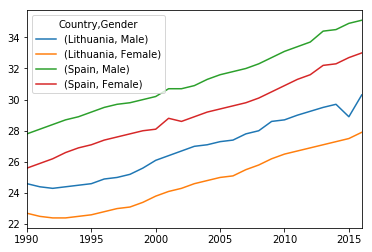

In [512]:


mean_age_marriages_select.T.plot()

In [411]:
#Reading in divorce sheet
divorce = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'DivorceRate', header = 3, skipfooter = 17)


In [412]:
#dropping Note column as it has no valuable info
divorce = divorce.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])


In [413]:
# the data was read in as object due to missing values. Selecting columns to convert to numeric
cols = divorce.columns.drop('Country', "Gender")
cols

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017],
      dtype='object')

In [414]:
# converting to numeric
divorce[cols] = divorce[cols].apply(pd.to_numeric, errors='coerce')

divorce_select = divorce.get((divorce.Country == "Spain") | (divorce.Country == "Lithuania"))
divorce_select

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
18,Lithuania,3.4,4.1,3.8,3.8,3.0,2.8,3.1,3.2,3.3,...,3.2,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1,3.0
28,Spain,0.6,0.7,0.7,0.7,0.8,0.8,0.8,0.9,0.9,...,2.4,2.1,2.2,2.2,2.2,2.0,2.2,2.1,2.1,2.0


In [415]:
# setting index to country so I can plot transposed table
divorce.set_index("Country", inplace = True)
div_top = divorce.sort_values(2016, ascending = False).head(10)


In [416]:
div_top

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,4.76,4.6,4.57,4.3901,4.33,4.34,4.19,NaN,...,3.5,3.5,3.6,3.6,3.4,3.3,3.2,3.1,3.2,NaN
Lithuania,3.4,4.1,3.80,3.8,3.00,2.8000,3.10,3.20,3.30,3.2,...,3.2,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1,3.0
Latvia,4.0,4.2,5.60,4.0,3.30,3.1000,2.50,2.50,2.60,2.5,...,2.9,2.4,2.4,4.0,3.6,3.5,3.1,2.6,3.1,3.1
Denmark,2.7,2.5,2.50,2.5,2.60,2.5000,2.40,2.40,2.50,2.5,...,2.7,2.7,2.6,2.6,2.8,3.4,3.4,2.9,3.0,2.6
Estonia,3.7,3.7,4.30,3.9,3.80,5.2000,4.00,3.80,3.20,3.3,...,2.6,2.4,2.2,2.3,2.4,2.5,2.4,2.6,2.5,2.5
Finland,2.6,2.6,2.60,2.5,2.70,2.7000,2.70,2.60,2.70,2.7,...,2.5,2.5,2.5,2.5,2.4,2.5,2.5,2.5,2.5,NaN
Sweden,2.3,2.3,2.50,2.5,2.50,2.6000,2.40,2.40,2.30,2.4,...,2.3,2.4,2.5,2.5,2.5,2.8,2.7,2.5,2.4,2.4
Czech Republic,3.1,2.8,2.80,2.9,3.00,3.0000,3.20,3.20,3.10,2.3,...,3.0,2.8,2.9,2.7,2.5,2.7,2.5,2.5,2.4,2.4
Cyprus,0.6,0.5,0.70,0.8,0.90,1.2000,1.10,1.30,1.30,1.7,...,2.1,2.2,2.3,2.3,2.4,2.2,2.2,2.1,2.3,NaN


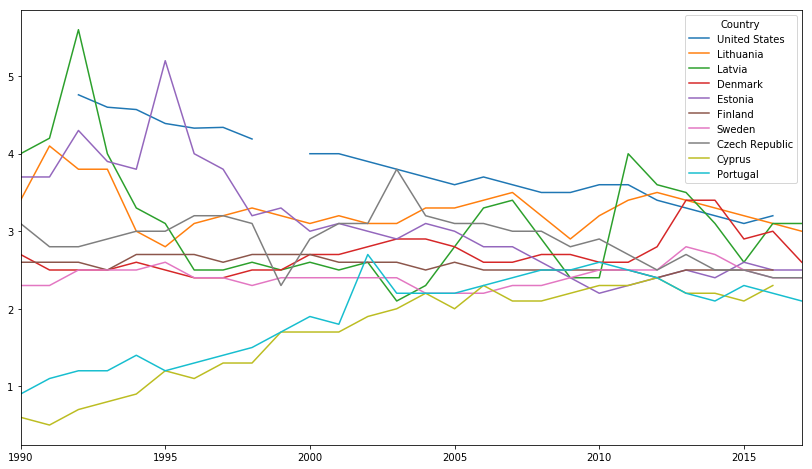

In [417]:
div_top.T.plot(figsize = (14,8))

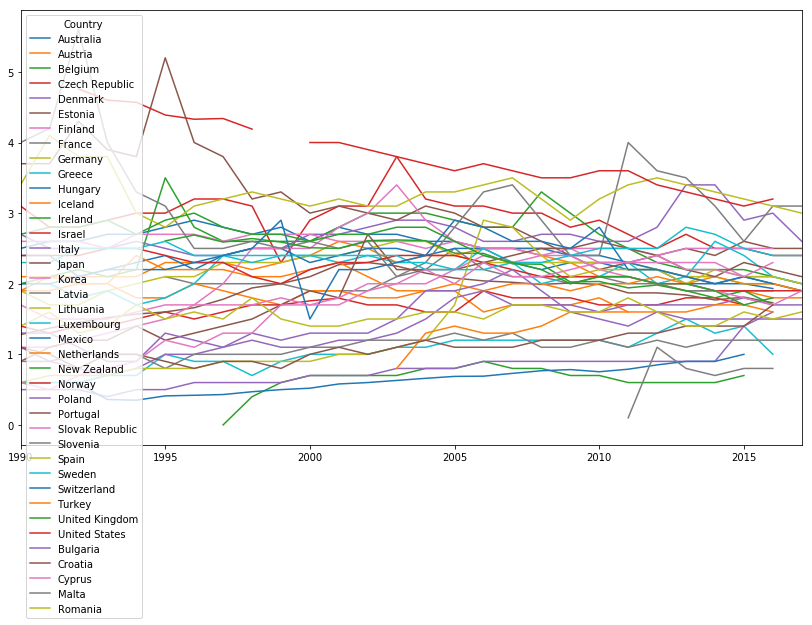

In [418]:
# plotting transposed table. Will need to remove some countries to make it actually readable
divorce.T.plot(figsize = (14,8))

In [420]:
previous_marriages = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'PrevMaritalStatus', header = 3, skipfooter = 12)

In [421]:
previous_marriages = previous_marriages.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])


In [456]:
previous_marriages["Country"] = previous_marriages["Country"].ffill()
previous_marriages = previous_marriages.rename(columns = {"Unnamed: 2": "Previous_marital_status"})
previous_marriages_select = previous_marriages.get(
    (previous_marriages["Country"] == "Spain") | (previous_marriages["Country"] == "Lithuania"))

In [457]:
previous_marriages_select

,Country,Previous_marital_status,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
60,Lithuania,Single never married,..,..,..,..,..,81.6391,80.5674,80.7897,...,..,77.349,78.8726,79.2969,78.2321,78.7937,78.4137,77.7527,78.1007,76.7579
61,Lithuania,Divorced,..,..,..,..,..,15.553,16.3607,16.7119,...,..,20.9658,19.6232,19.0871,20.1628,19.6404,19.9936,20.6643,20.4712,21.6471
62,Lithuania,Widowed,..,..,..,..,..,2.8079,3.07191,2.4984,...,..,1.68516,1.50424,1.61601,1.60502,1.5659,1.59265,1.58296,1.42812,1.59507
90,Spain,Single never married,95.9144,95.4028,95.0745,94.6826,94.3426,94.3597,94.1505,94.0455,...,89.1438,88.3244,86.8358,85.8513,85.383,85.2647,84.2345,84.2867,83.7577,83.0259
91,Spain,Divorced,3.21312,3.71629,4.01127,4.43258,4.78318,4.79725,5.02592,5.18654,...,10.146,10.9534,12.3279,13.3442,13.7783,13.9138,14.9521,14.918,15.4854,16.185
92,Spain,Widowed,0.872432,0.880933,0.914202,0.884778,0.874176,0.8431,0.823612,0.767943,...,0.710207,0.722194,0.836345,0.804451,0.838706,0.821521,0.813427,0.79529,0.756971,0.789083


In [423]:
marriages = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'MarriageRates', header = 3, skipfooter = 21)

In [424]:
marriages = marriages.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])
marriages.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,6.9,6.6,6.6,6.411,6.2,6.1,5.8,5.8,5.9,...,5.5,5.5,5.4,5.4,5.4,5.1,5.2,4.8,4.9,NaN
1,Austria,5.9,5.7,5.8,5.7,5.5,5.4,5.3,5.2,4.9,...,4.2,4.3,4.5,4.3,4.6,4.3,4.4,5.1,5.1,5.1
2,Belgium,6.5,6.1,5.8,5.4,5.1,5.1,5,4.7,4.4,...,4.3,4,3.9,3.7,3.8,3.4,3.6,4,3.9,3.9
3,Canada,6.8,6.1,5.8,5.6,5.5,5.5,5.3,5.1,5.1,...,4.4,..,..,..,..,..,..,..,..,NaN
4,Chile,..,..,6.6,6.7,6.5,6.058,5.8,5.3,5,...,3.3,3.3,3.53112,3.755,3.65358,3.485,3.64037,3.429,..,NaN


In [516]:
marriages_select = marriages.get(
    (marriages["Country"] == "Spain") | (marriages["Country"] == "Lithuania"))

In [517]:
marriages_select

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
20,Lithuania,9.8,9.2,8.1,6.4,6.4,6.1,5.7,5.3,5.2,...,7.5,6.5,6,6.3,6.9,6.9,7.6,7.6,7.4,7.5
30,Spain,5.7,5.6,5.6,5.1,5.1,5.1,4.9,5,5.2,...,4.2,3.7,3.6,3.4,3.5,3.3,3.4,3.6,3.7,3.7


In [425]:
marriage_length = pd.read_csv("series-1732322112c.csv")


In [426]:
marriage_length = marriage_length[['PERIOD', "VALUE"]]

In [427]:
marriage_length.set_index("PERIOD", inplace = True)

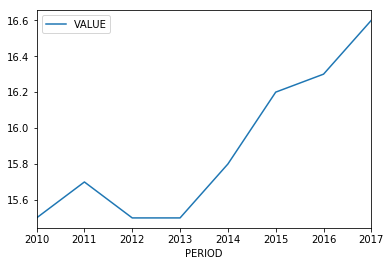

In [428]:
marriage_length.plot()

In [429]:
average_duration_marriage = pd.read_excel("SF_3_2_Family_dissolution_children.xlsx", sheet_name= 'Table SF3.2.A', 
                        header = 3, skipfooter =15)

In [430]:
average_duration_marriage = average_duration_marriage.drop(columns = ["Unnamed: 0"])
average_duration_marriage.columns

Index(['Unnamed: 1', 'Less than 1 year', '1 to 4 years', '5 to 9 years',
       '10 to 14 years', '15 to 19 years', '20+ years', 'Not stated'],
      dtype='object')

In [453]:
average_duration_marriage = average_duration_marriage.rename(columns = {"Unnamed: 1": "Country"})

In [454]:
average_duration_marriage_select = average_duration_marriage.get(
    (average_duration_marriage["Country"] == "Spain") | (average_duration_marriage["Country"] == "Lithuania"))

In [455]:
average_duration_marriage_select

,Country,Less than 1 year,1 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20+ years,Not stated
28,Spain,0.279105,13.558152,22.800253,17.355316,14.047304,31.95987,..
38,Lithuania,0.942398,19.136455,23.473411,13.049332,12.183864,31.21454,..


In [527]:
divorce_by_kids = pd.read_excel("SF_3_2_Family_dissolution_children.xlsx", sheet_name= 'Table SF3.2.B', 
                        header = 5, skipfooter =15)

In [528]:
divorce_by_kids = divorce_by_kids.drop(columns = ["Unnamed: 0", "Unnamed: 3", "Unnamed: 8"])
divorce_by_kids = divorce_by_kids.rename(columns = {"Unnamed: 1": "Country", "Unnamed: 2": "Divorce_no_children", 
                                  "Total": "Total_with_children", "Unnamed: 9": "Unknown"})
divorce_by_kids["Unknown"] = divorce_by_kids["Unknown"].apply(pd.to_numeric, errors='coerce')

In [529]:
divorce_by_kids_select = divorce_by_kids.get(
    (divorce_by_kids["Country"] == "Spain") | (divorce_by_kids["Country"] == "Lithuania"))

In [544]:
divorce_by_kids_select = divorce_by_kids_select.fillna(0).set_index("Country")

In [553]:
divorce_by_kids_select_no = divorce_by_kids_select.drop(["Total_with_children"], axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12e0d6080>,
      dtype=object)

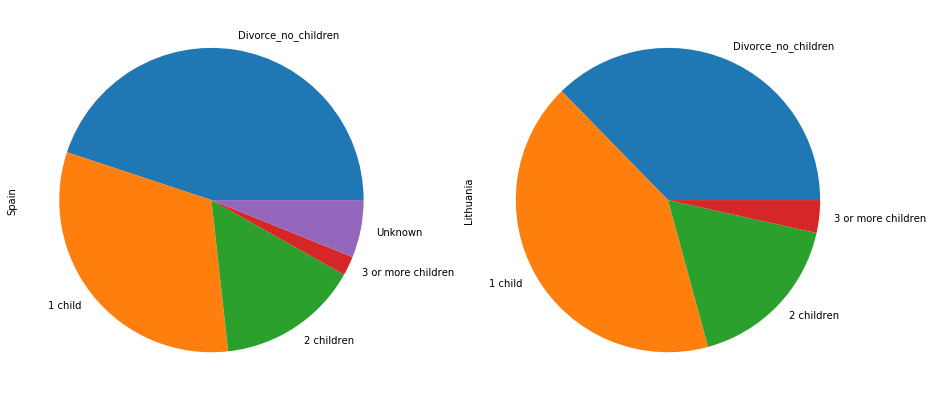

In [556]:
divorce_by_kids_select_no.T.plot.pie(subplots = True, legend = None, figsize = (15,15))


In [521]:
marriages_select.append(divorce_select).append(previous_marriages_select).append(mean_age_marriages_select)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Previous_marital_status
20,Lithuania,9.8,9.2,8.1,6.4,6.4,6.1,5.7,5.3,5.2,...,6.5,6,6.3,6.9,6.9,7.6,7.6,7.4,7.5,NaN
30,Spain,5.7,5.6,5.6,5.1,5.1,5.1,4.9,5,5.2,...,3.7,3.6,3.4,3.5,3.3,3.4,3.6,3.7,3.7,NaN
18,Lithuania,3.4,4.1,3.8,3.8,3,2.8,3.1,3.2,3.3,...,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1,3.0,NaN
28,Spain,0.6,0.7,0.7,0.7,0.8,0.8,0.8,0.9,0.9,...,2.1,2.2,2.2,2.2,2,2.2,2.1,2.1,2.0,NaN
60,Lithuania,..,..,..,..,..,81.6391,80.5674,80.7897,80.0611,...,78.8726,79.2969,78.2321,78.7937,78.4137,77.7527,78.1007,76.7579,NaN,Single never married
61,Lithuania,..,..,..,..,..,15.553,16.3607,16.7119,17.6531,...,19.6232,19.0871,20.1628,19.6404,19.9936,20.6643,20.4712,21.6471,NaN,Divorced
62,Lithuania,..,..,..,..,..,2.8079,3.07191,2.4984,2.28576,...,1.50424,1.61601,1.60502,1.5659,1.59265,1.58296,1.42812,1.59507,NaN,Widowed
90,Spain,95.9144,95.4028,95.0745,94.6826,94.3426,94.3597,94.1505,94.0455,93.9696,...,86.8358,85.8513,85.383,85.2647,84.2345,84.2867,83.7577,83.0259,NaN,Single never married
91,Spain,3.21312,3.71629,4.01127,4.43258,4.78318,4.79725,5.02592,5.18654,5.26031,...,12.3279,13.3442,13.7783,13.9138,14.9521,14.918,15.4854,16.185,NaN,Divorced
92,Spain,0.872432,0.880933,0.914202,0.884778,0.874176,0.8431,0.823612,0.767943,0.770137,...,0.836345,0.804451,0.838706,0.821521,0.813427,0.79529,0.756971,0.789083,NaN,Widowed
